# Análisis detalle Avisos

* ** Modalidades de trabajo (tiempo) **

* ** Seniority de los avisos **

* ** Zona de los avisos **

* ** Áreas de especialización más buscadas en los avisos **

* ** Empresas **

* ** Análisis de los primeros 130 caracteres/25 palabras (son los que se ven en la mini descripcion en zona jobs antes de clickear un aviso) de la descripcion (sin html) para ver cuales son las palabras mas relevantes.**

* ** Análisis de palabras más frecuentes en los títulos ** 

In [1]:
import numpy as np 
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import re # regex
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS # Wordcloud: pip install wordcloud

%matplotlib inline

In [2]:
avisos_detalle = pd.read_csv('../input/fiuba_6_avisos_detalle.csv')

In [3]:
avisos_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [4]:
avisos_detalle.columns

Index(['idaviso', 'idpais', 'titulo', 'descripcion', 'nombre_zona', 'ciudad',
       'mapacalle', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa'],
      dtype='object')

### **Limpieza**

In [5]:
avisos_detalle['idpais'].value_counts() 

1    13534
Name: idpais, dtype: int64

In [6]:
avisos_detalle = avisos_detalle.drop(['idpais'], axis=1)
avisos_detalle.columns

Index(['idaviso', 'titulo', 'descripcion', 'nombre_zona', 'ciudad',
       'mapacalle', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa'],
      dtype='object')

In [7]:
avisos_detalle['mapacalle'].value_counts()

SARMIENTO 1937                      43
Microcentro                         30
Buenos Aires                        24
Palermo                             23
Barracas                            18
Puerto Madero                       15
Belgrano                            14
Reconquista 865                     13
retiro                              12
Recoleta                            10
Parque Patricios                    10
saavedra                             8
nuñez                                8
Peron 955                            7
Pasaje Aguado 628                    6
25 de Mayo 457 7º piso               6
Monserrat                            6
Mataderos                            6
San Telmo                            6
Amenábar 1074                        5
Av. Libertador 6810 4º A             5
calle 7 nº1565 e/64 y 65             5
Villa Soldati                        5
Nicasio Oroño 1420                   4
México 2051                          4
Gral. Roca 4530          

In [8]:
print("El", round(100 * avisos_detalle['mapacalle'].isnull().sum()/len(avisos_detalle), 2), "% de los datos de la columna mapacalle son nulos")

El 93.56 % de los datos de la columna mapacalle son nulos


In [9]:
avisos_detalle = avisos_detalle.drop(['mapacalle'], axis=1)
avisos_detalle.columns

Index(['idaviso', 'titulo', 'descripcion', 'nombre_zona', 'ciudad',
       'tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa'],
      dtype='object')

In [10]:
avisos_detalle['ciudad'].isnull().sum()

13487

In [11]:
print("El", round(100 * avisos_detalle['ciudad'].isnull().sum()/len(avisos_detalle), 2), "% de los datos de la columna ciudad son nulos")

El 99.65 % de los datos de la columna ciudad son nulos


In [12]:
avisos_detalle['ciudad'].value_counts()

Buenos Aires                14
Argentina                   13
CABA                         3
Capital Federal              2
San Isidro                   2
Tortuguitas                  1
Santa Rosa                   1
La Plata                     1
Mendoza                      1
Vicente Lopez                1
Buenos Aires Province        1
caba                         1
Microcentro                  1
Barracas                     1
Parque Patricios             1
República Argentina          1
Zárate, Campana, Escobar     1
paternal                     1
Name: ciudad, dtype: int64

In [13]:
avisos_detalle = avisos_detalle.drop(['ciudad'], axis=1)
avisos_detalle.columns

Index(['idaviso', 'titulo', 'descripcion', 'nombre_zona', 'tipo_de_trabajo',
       'nivel_laboral', 'nombre_area', 'denominacion_empresa'],
      dtype='object')

## **Análisis**

### **Seniority**

In [14]:
avisos_detalle['nivel_laboral'].isnull().sum()

0

In [15]:
avisos_detalle['nivel_laboral'].value_counts()

Senior / Semi-Senior                    9407
Junior                                  2216
Otro                                     921
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

<BarContainer object of 5 artists>

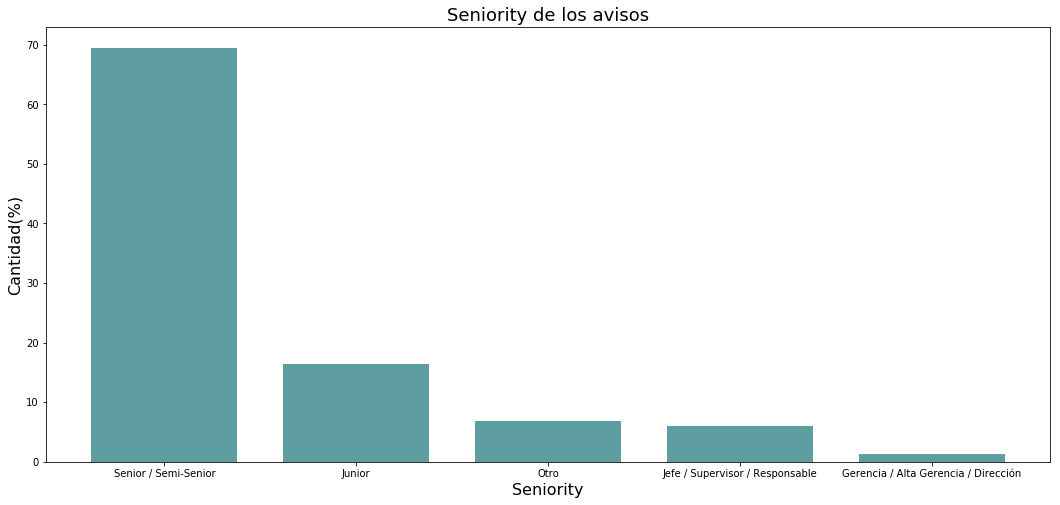

In [16]:
seniorities = ['Senior / Semi-Senior','Junior','Otro','Jefe / Supervisor / Responsable','Gerencia / Alta Gerencia / Dirección']
num_items=len(seniorities)
plt.figure(figsize=(18,8))
margin = 0.05
width = 4*(1.-1*margin)/num_items
plt.title('Seniority de los avisos', fontsize=18)
plt.xlabel('Seniority', fontsize=16)
plt.ylabel('Cantidad(%)', fontsize=16)
plt.bar(seniorities, 100 * avisos_detalle.nivel_laboral.value_counts()/len(avisos_detalle), width, color="cadetblue")

### **Modalidades de trabajo (tiempo)**

In [17]:
avisos_detalle['tipo_de_trabajo'].isnull().sum()

0

In [18]:
avisos_detalle['tipo_de_trabajo'].value_counts()

Full-time          12339
Part-time            863
Teletrabajo          110
Pasantia              63
Por Horas             63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64

<BarContainer object of 9 artists>

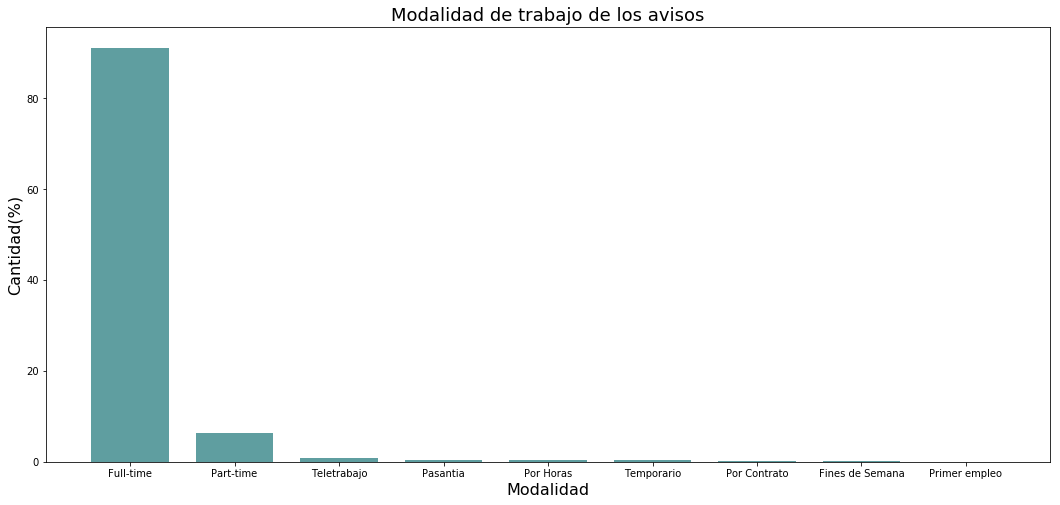

In [19]:
modalidades_trabajo = ['Full-time','Part-time','Teletrabajo','Pasantia','Por Horas','Temporario','Por Contrato','Fines de Semana','Primer empleo']
num_items=len(modalidades_trabajo)
plt.figure(figsize=(18,8))
margin = 0.05
width = 7*(1.-1*margin)/num_items
plt.title('Modalidad de trabajo de los avisos', fontsize=18)
plt.xlabel('Modalidad', fontsize=16)
plt.ylabel('Cantidad(%)', fontsize=16)
plt.bar(modalidades_trabajo, 100 * avisos_detalle.tipo_de_trabajo.value_counts()/len(avisos_detalle), width, color="cadetblue")


### **Zona de los avisos**

In [20]:
avisos_detalle['nombre_zona'].isnull().sum()

0

In [21]:
avisos_detalle['nombre_zona'].value_counts()

Gran Buenos Aires              12654
Capital Federal                  876
Buenos Aires (fuera de GBA)        2
GBA Oeste                          2
Name: nombre_zona, dtype: int64

<BarContainer object of 4 artists>

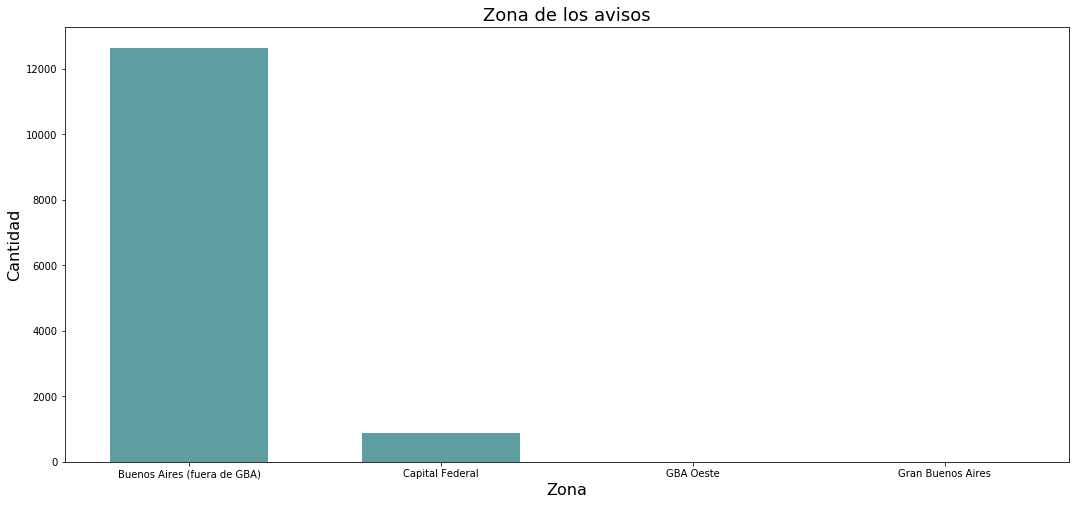

In [22]:
zona_avisos = ['Buenos Aires (fuera de GBA)','Capital Federal','GBA Oeste','Gran Buenos Aires']
num_items=len(zona_avisos)
plt.figure(figsize=(18,8))
margin = 0.5
width = 5*(1.-1*margin)/num_items
plt.title('Zona de los avisos', fontsize=18)
plt.xlabel('Zona', fontsize=16)
plt.ylabel('Cantidad', fontsize=16)
plt.bar(zona_avisos, avisos_detalle.nombre_zona.value_counts(), width, color="cadetblue")

### **Área de especialización de los avisos**

In [23]:
avisos_detalle['nombre_area'].isnull().sum()

0

In [24]:
avisos_detalle['nombre_area'].value_counts()

Ventas                                   1659
Comercial                                 983
Administración                            901
Producción                                821
Programación                              576
Contabilidad                              416
Tecnologia / Sistemas                     388
Atención al Cliente                       347
Mantenimiento                             324
Recursos Humanos                          235
Gastronomia                               234
Oficios y Profesiones                     209
Soporte Técnico                           203
Logística                                 200
Call Center                               191
Almacén / Depósito / Expedición           184
Compras                                   170
Marketing                                 153
Otros                                     153
Administración de Personal                152
Recepcionista                             151
Transporte                        

In [25]:
# TOP 15 de las areas mas buscadas
grouped_by_area_avisos = avisos_detalle.groupby('nombre_area')['nombre_area']\
    .agg(['count']).sort_values(by='count', ascending=False).head(15)
grouped_by_area_avisos = grouped_by_area_avisos.apply(lambda row: 100 * row['count'] / len(avisos_detalle), axis=1)
grouped_by_area_avisos

nombre_area
Ventas                   12.258017
Comercial                 7.263189
Administración            6.657308
Producción                6.066204
Programación              4.255948
Contabilidad              3.073740
Tecnologia / Sistemas     2.866854
Atención al Cliente       2.563913
Mantenimiento             2.393971
Recursos Humanos          1.736368
Gastronomia               1.728979
Oficios y Profesiones     1.544259
Soporte Técnico           1.499926
Logística                 1.477760
Call Center               1.411261
dtype: float64

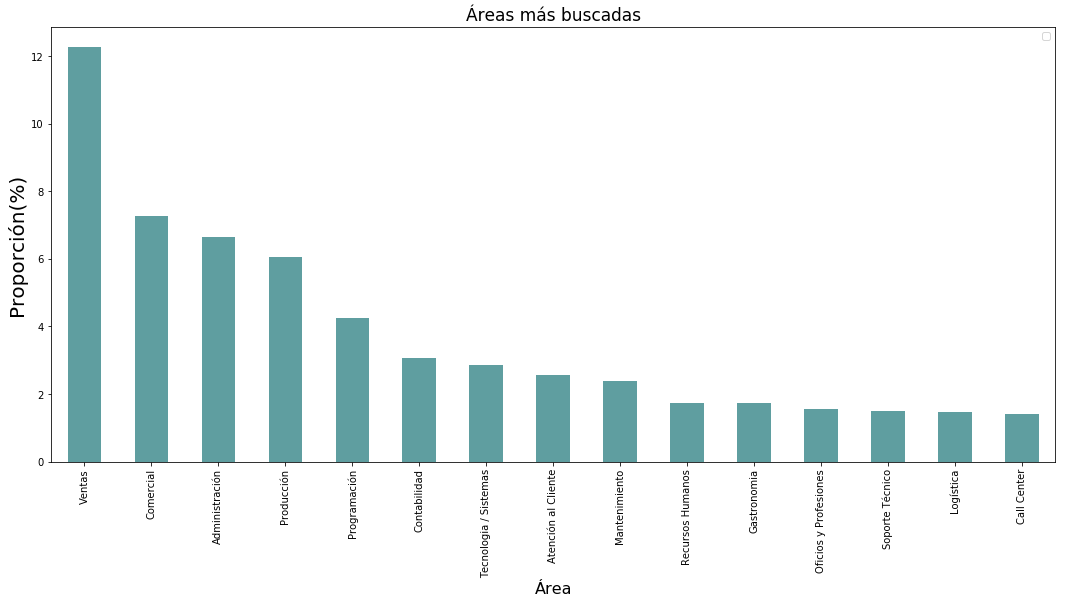

In [26]:
grouped_by_area_avisos.plot.bar(rot=0, figsize=(18,8), color='cadetblue', fontsize=10);
plt.ylabel('Proporción(%)', fontsize=20)
plt.xlabel('Área', fontsize=16)
plt.title('Áreas más buscadas', fontsize=17)
plt.legend('')
plt.xticks(rotation=90)
plt.show()

### **Empresas**

In [27]:
# TOP 20 empresas con más avisos
empresas_top = avisos_detalle.groupby('denominacion_empresa')['denominacion_empresa']\
    .agg(['count']).sort_values(by='count', ascending=False).head(20)
empresas_top = empresas_top.apply(lambda row: 100 * row['count'] / len(avisos_detalle), axis=1)
empresas_top

denominacion_empresa
RANDSTAD                              4.152505
Manpower                              3.118073
Grupo Gestión                         2.829910
Assistem                              2.135363
SOLUTIX S.A.                          1.921088
BAYTON                                1.758534
Pullmen Servicios Empresarios S.A.    1.692035
Adecco - Región NORTE & OESTE GBA     1.514704
Suministra                            1.499926
Adecco -Región Office                 1.477760
Consultores de Empresas SRL           1.455593
Complement Group (holding)            1.182208
Adecco -Región GBA SUR                1.182208
Kaizen Recursos Humanos               0.812768
Adecco  -Región Litoral               0.805379
IT Resources                          0.805379
CrossOver                             0.805379
Excelencia Laboral S.A.               0.724102
Suple                                 0.650214
Swiss Medical Group                   0.650214
dtype: float64

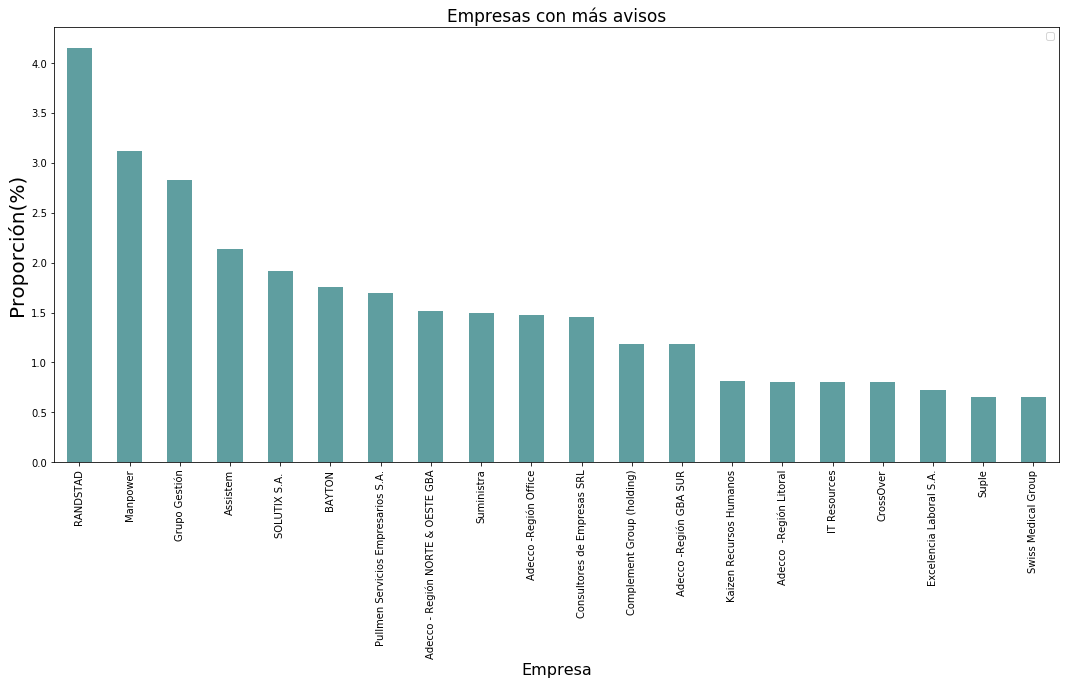

In [28]:
empresas_top.plot.bar(rot=0, figsize=(18,8), color='cadetblue', fontsize=10);
plt.ylabel('Proporción(%)', fontsize=20)
plt.xlabel('Empresa', fontsize=16)
plt.title('Empresas con más avisos', fontsize=17)
plt.legend('')
plt.xticks(rotation=90)
plt.show()

### **Analisis primeros caracteres de la descripcion**

In [29]:
def process_words(row, col, col_new):  
    row[col_new] = row[col]
    words = row[col_new].split()
    
    # Se filtran las stop words y los simbolos
    valid_words = []
    for word in words:
        for w in stopwords:
            if (word.lower() == w):
                word = word.lower().replace(w, '')
        for inv in invalid_characters:
            word = word.lower().replace(inv, '')
        if (word != ''):
            valid_words.append(word)
        
    row[col_new] = set(valid_words) 
    return row

In [30]:
stopwords = ['a', 'al', 'ante', 'aquel', 'aires', 'bien', 'buenos', 'como', 'con', 'conseguir', 'cual', 'de', 'del', 
             'desde', 'donde', 'e', 'el', 'ella', 'ello', 'en', 'es', 'esa', 'encima', 'entonces', 'entre', 'encontramos', 'encuentra', 'era', 'esta', 'está',
             'estás', 'estas' 'estan', 'están', 'etc', 'fe', 'fue', 'ha', 'hacen', 'hacemos', 'hacer', 'hasta', 'incluso', 'ir', 'jamas', 
             'jamás', 'la', 'las', 'lo', 'los', 'más', 'me', 'menos', 'mi', 'mis', 'misma', 'mismo', 'mucha', 'muchas', 
             'mucho', 'muchos', 'muy', 'ni', 'no', 'nos', 'nosotros', 'nuestra', 'o', 'para', 'por', 'puesta', 'que', 'qué', 'sabe', 'santa', 'saber', 'se', 
             'según', 'ser', 'serán', 'seran', 'si', 'sí', 'siendo', 'sin', 'sobre', 'solo', 'solicita', 'somos', 'su', 'sus', 'te', 'tiene', 'tus', 'tu', 'uso', 
             'un', 'una', 'vaya', 'y']

invalid_characters = [',', ':', '.', ';', '', '?', '¿', '!', '¡', '(', ')', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
                      '<', '>', '-', '_', '/', '*']

def clean_html(string):
    clean_html_regex = re.compile('<.*?>')
    string = re.sub(clean_html_regex, '', string)
    return string

def process_top_words(row, col, col_new):  
    row[col] = clean_html(row[col])
    row[col_new] = row[col]
    # Se conservan los primeros 130 caracteres que son los que se ven en la vista previa
    # Descarto este enfoque porque se pierden algunas palabras que quedan partidas en la mitad
    #row['descripcion'] = row['descripcion'][0:130] 
    
    # En cambio nos quedamos con las primeras n palabras
    words = row[col_new].split()
    words = words[:25]
    
    # Se filtran las stop words y los simbolos
    valid_words = []
    for word in words:
        for w in stopwords:
            if (word.lower() == w):
                word = word.lower().replace(w, '')
        for inv in invalid_characters:
            word = word.lower().replace(inv, '')
        if (word != ''):
            valid_words.append(word)
        
    row[col_new] = set(valid_words) 
    return row

In [31]:
avisos_detalle = avisos_detalle.apply(lambda row: process_top_words(row, 'descripcion', 'descripcion_top_words_small'), axis=1)

In [32]:
avisos_detalle['descripcion_top_words_small'][10]

{'cruz',
 'incorporar',
 'minera',
 'operación',
 'paramedico',
 'proceso',
 'provincia',
 'puede',
 'selección',
 'ubicada'}

In [33]:
avisos_detalle.head(2)

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,descripcion_top_words_small
0,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,"Empresa: Distribuidor de repuestos automotor, ...",Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR,"{agrícolas, industriales, ventaspaísciudad, au..."
1,17903700,Enfermeras,Solicitamos para importante cadena de farmacia...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste,"{farmacias, zona, experiencia, zoeste, añosres..."


In [34]:
lista_palabras_frecuentes_descripcion_small = []

def add_word(row, columna):
    words = row[columna]
    for word in words:
        lista_palabras_frecuentes_descripcion_small.append(word)

avisos_detalle.apply(lambda row: add_word(row, 'descripcion_top_words_small'), axis=1)
avisos_detalle.head(1)

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,descripcion_top_words_small
0,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,"Empresa: Distribuidor de repuestos automotor, ...",Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR,"{agrícolas, industriales, ventaspaísciudad, au..."


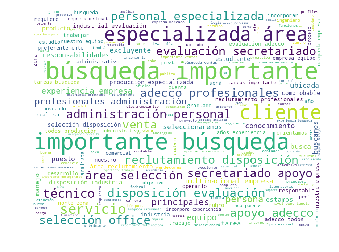

In [35]:
text = ''
for word in lista_palabras_frecuentes_descripcion_small:
    text += ' ' + word
wordcloud = WordCloud(relative_scaling = 1,
                      stopwords = stopwords, width=800, height=600,
                      background_color="white"
                      ).generate(text)
wordcloud.to_file('./wc1.png')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### **Palabras más frecuentes en los títulos**

In [36]:
avisos_detalle = avisos_detalle.apply(lambda row: process_words(row, 'titulo', 'titulo_top_words'), axis=1)

In [37]:
avisos_detalle.head(2)

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,descripcion_top_words_small,titulo_top_words
0,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,"Empresa: Distribuidor de repuestos automotor, ...",Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR,"{agrícolas, industriales, ventaspaísciudad, au...","{provincia, vendedora}"
1,17903700,Enfermeras,Solicitamos para importante cadena de farmacia...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste,"{farmacias, zona, experiencia, zoeste, añosres...",{enfermeras}


In [38]:
lista_palabras_frecuentes_titulos = []

def add_word(row, columna):
    words = row[columna]
    for word in words:
        lista_palabras_frecuentes_titulos.append(word)

avisos_detalle.apply(lambda row: add_word(row, 'titulo_top_words'), axis=1)
avisos_detalle.head(1)

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,descripcion_top_words_small,titulo_top_words
0,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,"Empresa: Distribuidor de repuestos automotor, ...",Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR,"{agrícolas, industriales, ventaspaísciudad, au...","{provincia, vendedora}"


In [39]:
# TOP 20 palabras mas frecuentes en el titulo
from collections import Counter
words_to_count = (word for word in lista_palabras_frecuentes_titulos if word[:1])
c = Counter(words_to_count)
print (c.most_common(20))
count_palabras_frecuentes_titulos = c.most_common(20)

[('analista', 1777), ('zona', 1299), ('técnico', 642), ('comercial', 621), ('administrativo', 546), ('ventas', 538), ('vendedor', 528), ('contable', 459), ('sr', 455), ('caba', 421), ('jefe', 414), ('asistente', 391), ('importante', 386), ('empresa', 360), ('supervisor', 346), ('jr', 339), ('ejecutivo', 335), ('mantenimiento', 323), ('norte', 322), ('ingeniero', 298)]


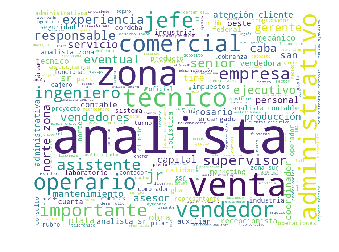

In [40]:
text = ''
for word in lista_palabras_frecuentes_titulos:
    text += ' ' + word
wordcloud = WordCloud(relative_scaling = 1,
                      stopwords = stopwords, width=800, height=600,
                      background_color="white"
                      ).generate(text)
wordcloud.to_file('./wc2.png')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### **Palabras más frecuentes en la descripción**

In [41]:
avisos_detalle = avisos_detalle.apply(lambda row: process_words(row, 'descripcion', 'descripcion_top_words'), axis=1)

In [42]:
lista_palabras_frecuentes_descripcion = []

def add_word(row, columna):
    words = row[columna]
    for word in words:
        lista_palabras_frecuentes_descripcion.append(word)

avisos_detalle.apply(lambda row: add_word(row, 'descripcion_top_words'), axis=1)
avisos_detalle.head(1)

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,descripcion_top_words_small,titulo_top_words,descripcion_top_words
0,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,"Empresa: Distribuidor de repuestos automotor, ...",Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR,"{agrícolas, industriales, ventaspaísciudad, au...","{provincia, vendedora}","{agrícolas, rosari, presenciamovilidad, feindu..."


In [43]:
# TOP 25 palabras mas frecuentes en la descripción
from collections import Counter
words_to_count = (word for word in lista_palabras_frecuentes_descripcion if word[:1])
c = Counter(words_to_count)
print (c.most_common(25))
count_palabras_frecuentes_descripcion = c.most_common(25)

[('experiencia', 9591), ('trabajo', 7209), ('empresa', 6881), ('búsqueda', 6525), ('importante', 5911), ('años', 5160), ('equipo', 4304), ('tareas', 4136), ('lunes', 3909), ('requisitos', 3859), ('zona', 3841), ('manejo', 3778), ('viernes', 3546), ('conocimientos', 3311), ('hs', 3242), ('principales', 3239), ('laboral', 3204), ('cliente', 3185), ('condiciones', 3146), ('empresas', 2994), ('contratación', 2938), ('desarrollo', 2808), ('área', 2777), ('disponibilidad', 2755), ('excluyente', 2752)]


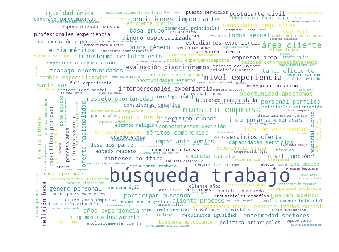

In [44]:
text = ''
for word in lista_palabras_frecuentes_descripcion:
    text += ' ' + word
wordcloud = WordCloud(relative_scaling = 1,
                      stopwords = stopwords, width=800, height=600,
                      background_color='white'
                      ).generate(text)
wordcloud.to_file('wc3.png')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Análisis Edad/Sexo/Educación

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime, date

sns.set_style('darkgrid')
%matplotlib inline

## **Limpieza/formateo**

In [146]:
Postulaciones_Edad = pd.read_csv('../input/fiuba_2_postulantes_genero_y_edad.csv')
Postulaciones_Estudios= pd.read_csv('../input/fiuba_1_postulantes_educacion.csv')

In [147]:
print ("Existen ", len(Postulaciones_Estudios), " registros con estudios")
print ("Existen ", len(Postulaciones_Edad), " registros con sexo y genero")

print("El", round(100 * Postulaciones_Estudios['idpostulante'].isnull().sum()/len(Postulaciones_Estudios), 2), "% de los datos de la columna idpostulante del set de estudios son nulos")
print("El", round(100 * Postulaciones_Edad['idpostulante'].isnull().sum()/len(Postulaciones_Edad), 2), "% de los datos de la columna idpostulante del set de edades son nulos")

Existen  298231  registros con estudios
Existen  200888  registros con sexo y genero
El 0.0 % de los datos de la columna idpostulante del set de estudios son nulos
El 0.0 % de los datos de la columna idpostulante del set de edades son nulos


In [148]:
Postulaciones_Estudios['idpostulante'].value_counts()

YlMLGD     9
EZD29      8
54MQGz     8
12eO0B     7
aa1KkD     7
Ee2ok0     7
zv8vOxE    7
8KOd6x     7
9692125    7
xk9VKeV    7
kPNrbZV    7
YNVjEr     7
8M21pBL    7
55R18N     7
Ez0LBk9    7
8keBRO     7
1BodWQ     7
8AZKkO     6
3NkbZwr    6
owarwYZ    6
2zLX4QY    6
2zmO1dY    6
ow5oYE4    6
e9BNrp     6
jk6WmM6    6
EzZv6Jo    6
6r5m8zr    6
1ZYPM3     6
63Rmv4     6
5JZzxZ     6
          ..
Nzr8964    1
bOVw2zB    1
VNrQ0QN    1
QNr4dOq    1
ow2pm8Z    1
pzdbrkM    1
BmDM0Bw    1
jk5rmeB    1
zvxNdYD    1
VNr841E    1
Eqx14z     1
OqP61b6    1
aGpaZq     1
KBdP0Bj    1
ekObL6r    1
bOjlrRB    1
kPBoX0j    1
YjNpK8D    1
W9Wr3PX    1
qe2MpKk    1
zvaZ05K    1
MVr3q8K    1
akj8rYN    1
ow2daQL    1
a5NDq0     1
5mP4M1w    1
wVYXkDp    1
ekNXml2    1
8QNqzD     1
QNr1el4    1
Name: idpostulante, Length: 188752, dtype: int64

In [149]:
Postulaciones_Estudios.loc[Postulaciones_Estudios['idpostulante'] == 'YlMLGD']

,idpostulante,nombre,estado
373,YlMLGD,Terciario/Técnico,En Curso
374,YlMLGD,Otro,En Curso
375,YlMLGD,Universitario,En Curso
2206,YlMLGD,Terciario/Técnico,Graduado
2207,YlMLGD,Universitario,Graduado
2208,YlMLGD,Otro,Graduado
2209,YlMLGD,Posgrado,Graduado
3659,YlMLGD,Universitario,Abandonado
3660,YlMLGD,Terciario/Técnico,Abandonado


In [150]:
def cuantificar_estudios(row):
    if (row['nombre'] == 'Doctorado'):
        row['nombre'] = 7
    if (row['nombre'] == 'Master'):    
        row['nombre'] = 6
    if (row['nombre'] == 'Posgrado'):    
        row['nombre'] = 5
    if (row['nombre'] == 'Universitario'):    
        row['nombre'] = 4
    if (row['nombre'] == 'Terciario/Técnico'):    
        row['nombre'] = 3
    if (row['nombre'] == 'Secundario'):    
        row['nombre'] = 2
    if (row['nombre'] == 'Otro'):    
        row['nombre'] = 1    
        
    if (row['estado'] == 'Graduado'):
        row['estado'] = 3
    if (row['estado'] == 'En Curso'):    
        row['estado'] = 2
    if (row['estado'] == 'Abandonado'):    
        row['estado'] = 1
        
    return row    

def descuantificar_estudios(row):
    if (row['nombre'] == 7):
        row['nombre'] = 'Doctorado'
    if (row['nombre'] == 6):    
        row['nombre'] = 'Master'
    if (row['nombre'] == 5):    
        row['nombre'] = 'Posgrado'
    if (row['nombre'] == 4):    
        row['nombre'] = 'Universitario'
    if (row['nombre'] == 3):    
        row['nombre'] = 'Terciario/Técnico'
    if (row['nombre'] == 2):    
        row['nombre'] = 'Secundario'
    if (row['nombre'] == 1):    
        row['nombre'] = 'Otro'    
        
    if (row['estado'] == 3):
        row['estado'] = 'Graduado'
    if (row['estado'] == 2):    
        row['estado'] = 'En Curso'
    if (row['estado'] == 1):    
        row['estado'] = 'Abandonado'
        
    return row    

In [151]:
Postulaciones_Estudios.apply(lambda row: cuantificar_estudios(row), axis=1)
Postulaciones_Estudios.head(1)

,idpostulante,nombre,estado
0,NdJl,5,2


In [152]:
grouped_postulantes = Postulaciones_Estudios.groupby('idpostulante')

In [153]:
print('Existen ', len(grouped_postulantes), ' postulantes diferentes con estudios registrados')

Existen  188752  postulantes diferentes con estudios registrados


In [154]:
grouped_postulantes = Postulaciones_Estudios.groupby('idpostulante').apply(lambda g: g.sort_index(by='nombre', ascending=False).head(1))

/home/tbotalla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [155]:
grouped_postulantes.reset_index(drop=True, inplace=True)
Postulaciones_Estudios = grouped_postulantes
Postulaciones_Estudios.apply(lambda row: descuantificar_estudios(row), axis=1)
Postulaciones_Estudios.loc[grouped_postulantes['idpostulante'] == 'YlMLGD']

,idpostulante,nombre,estado
117605,YlMLGD,Posgrado,Graduado


In [156]:
postulantes = pd.merge(Postulaciones_Estudios, Postulaciones_Edad, on =['idpostulante'])

In [157]:
postulantes.head(1)

,idpostulante,nombre,estado,fechanacimiento,sexo
0,0z5VvGv,Secundario,Graduado,1987-10-18,MASC


In [158]:
del Postulaciones_Estudios
del Postulaciones_Edad

## **Edad y Género**

In [159]:
postulantes['sexo'].value_counts()

FEM           97003
MASC          89016
NO_DECLARA     2733
Name: sexo, dtype: int64

### **Limpieza**

In [160]:
postulantes['fechanacimiento'].isnull().sum()

2874

In [161]:
postulantes = postulantes.dropna().reset_index()
del postulantes['index']

In [162]:
postulantes['fechanacimiento'].isnull().sum()

0

In [163]:
postulantes.head(1)

,idpostulante,nombre,estado,fechanacimiento,sexo
0,0z5VvGv,Secundario,Graduado,1987-10-18,MASC


In [164]:
postulantes['fechanacimiento']= pd.to_datetime(postulantes['fechanacimiento'],errors = 'coerce', format='%Y-%m-%d')

In [165]:
postulantes = postulantes.dropna().reset_index()

In [166]:
postulantes['sexo'].value_counts()

FEM           96729
MASC          88732
NO_DECLARA      411
Name: sexo, dtype: int64

In [167]:
def calculate_age(year, month, day):
    today = date.today()
    return today.year - year - ((today.month, today.day) < (month, day))

postulantes['edad'] = postulantes['fechanacimiento'].map(lambda x: calculate_age(x.year,x.month,x.day))

In [168]:
postulantes.dtypes

index                       int64
idpostulante               object
nombre                     object
estado                     object
fechanacimiento    datetime64[ns]
sexo                       object
edad                        int64
dtype: object

In [169]:
postulantes['edad'].isnull().sum()

0

In [170]:
postulantes = postulantes.dropna().reset_index()

In [171]:
postulantes['edad'] = postulantes['edad'].astype(int)
del postulantes['index']

In [172]:
postulantes.dtypes

level_0                     int64
idpostulante               object
nombre                     object
estado                     object
fechanacimiento    datetime64[ns]
sexo                       object
edad                        int64
dtype: object

### **Postulantes con edad de jubilación**

In [173]:
edad_jubilacion_fem=60
edad_jubilacion_masc=65
edad_legal=18
cantidad_postulantes_fem=len(postulantes.loc[postulantes['sexo'] == 'FEM'])
cantidad_postulantes_masc=len(postulantes.loc[postulantes['sexo'] == 'MASC'])

In [174]:
postulantes_jubilables_fem = postulantes.loc[postulantes['edad'] > edad_jubilacion_fem]
postulantes_jubilables_fem = postulantes_jubilables_fem.loc[postulantes_jubilables_fem['sexo'] == 'FEM']
postulantes_jubilables_fem.head(3)

,level_0,idpostulante,nombre,estado,fechanacimiento,sexo,edad
1253,1253,0zP3W2r,Secundario,Graduado,1950-08-26,FEM,67
1916,1916,0zPRGGd,Secundario,Graduado,1954-01-22,FEM,64
5018,5018,144z5B,Posgrado,Graduado,1957-03-21,FEM,61


In [175]:
print('El ', round(100 * len(postulantes_jubilables_fem)/cantidad_postulantes_fem, 2), '% de las postulantes mujeres están en edad de jubilación')

El  0.11 % de las postulantes mujeres están en edad de jubilación


In [176]:
postulantes_jubilables_masc = postulantes.loc[postulantes['edad'] > edad_jubilacion_masc]
postulantes_jubilables_masc = postulantes_jubilables_masc.loc[postulantes_jubilables_masc['sexo'] == 'MASC']
postulantes_jubilables_masc.head(3)

,level_0,idpostulante,nombre,estado,fechanacimiento,sexo,edad
19559,19559,4rePXEA,Doctorado,Graduado,1949-06-15,MASC,68
20259,20259,52DWRk,Universitario,Graduado,1946-12-03,MASC,71
20889,20889,59rBOv,Universitario,Abandonado,1951-01-01,MASC,67


In [177]:
print('El ', round(100 * len(postulantes_jubilables_masc)/cantidad_postulantes_masc, 2), '% de los postulantes hombres están en edad de jubilación')

El  0.08 % de los postulantes hombres están en edad de jubilación


### **Postulantes menores de edad**

In [178]:
postulantes_menores = postulantes.loc[postulantes['edad'] < edad_legal]
postulantes_menores.head(3)

,level_0,idpostulante,nombre,estado,fechanacimiento,sexo,edad
911,911,0zNWeJM,Secundario,Graduado,2000-05-16,FEM,17
1127,1127,0zP1Xaq,Secundario,Graduado,2000-04-17,FEM,17
1416,1416,0zP9Nxr,Secundario,Graduado,2000-06-02,FEM,17


In [179]:
print('El ', round(100 * len(postulantes_menores)/len(postulantes), 2), '% de los postulantes son menores de edad')

El  0.06 % de los postulantes son menores de edad


In [180]:
print('Representan el ', round(100 * (len(postulantes_menores) + len(postulantes_jubilables_fem) + len(postulantes_jubilables_masc))/len(postulantes), 2), '% del total de postulantes')

Representan el  0.16 % del total de postulantes


### **Distribución edades**

In [181]:
postulantes['edad'].value_counts()

26     11593
25     11365
24     11153
27     11081
23     10910
22     10323
28      9563
21      9197
29      9118
30      8048
31      7544
20      7367
32      6622
33      5674
19      5394
34      5302
35      4833
36      4568
37      3982
38      3690
39      3282
40      2870
41      2496
18      2373
42      2206
43      2008
44      1609
45      1411
46      1384
47      1208
       ...  
52       608
53       598
54       544
55       442
56       426
57       356
58       268
59       228
61       174
60       152
17       119
62       102
63        65
64        44
67        30
65        24
66        17
68        14
69         6
70         6
75         5
71         3
73         2
242        1
100        1
74         1
76         1
78         1
96         1
12         1
Name: edad, Length: 64, dtype: int64

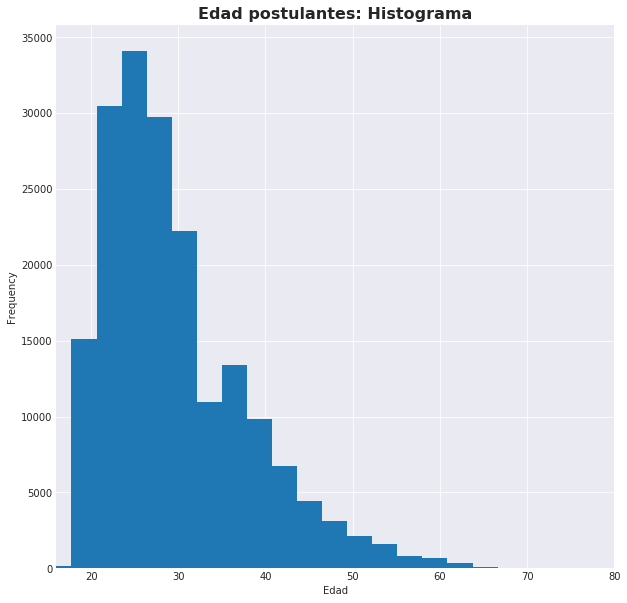

In [182]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Edad postulantes: Histograma', fontsize=16, fontweight='bold')
ax.set_xlabel('Edad')
ax.set_xlim([16,80])
postulantes['edad'].plot.hist(figsize=[10,10], bins=80)

In [183]:
P_Masculino_Edad = postulantes[postulantes['sexo']=='MASC']

In [189]:
len(P_Masculino_Edad)

88732

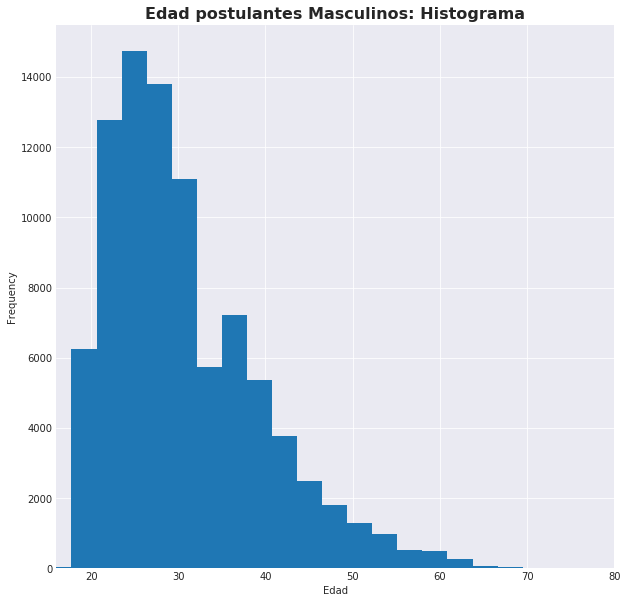

In [195]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Edad postulantes Masculinos: Histograma', fontsize=16, fontweight='bold')
ax.set_xlabel('Edad')
ax.set_xlim([16,80])
P_Masculino_Edad['edad'].plot.hist(figsize=[10,10], bins=80)

In [185]:
P_Femenino_Edad = postulantes[postulantes['sexo']=='FEM']

In [188]:
len(P_Femenino_Edad)

96729

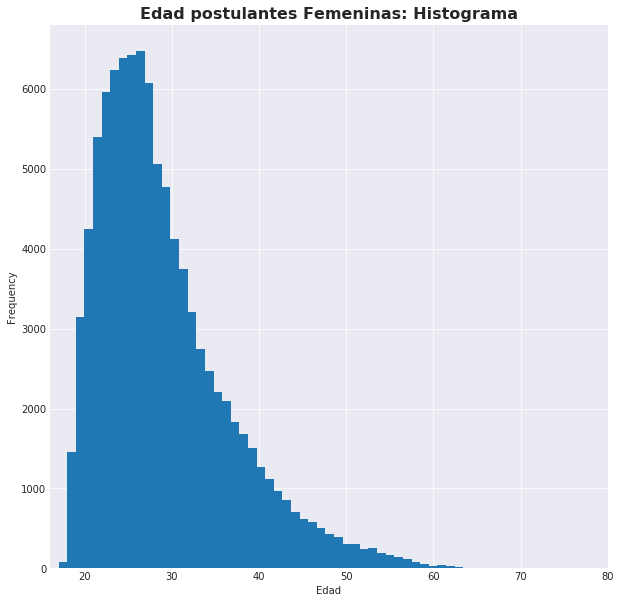

In [196]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Edad postulantes Femeninas: Histograma', fontsize=16, fontweight='bold')
ax.set_xlabel('Edad')
ax.set_xlim([16,80])
P_Femenino_Edad['edad'].plot.hist(figsize=[10,10], bins=80)

## Estudios

In [124]:
postulantes.head(3)

,level_0,idpostulante,nombre,estado,fechanacimiento,sexo,edad
0,0,0z5VvGv,Secundario,Graduado,1987-10-18,MASC,30
1,1,0zB026d,Terciario/Técnico,Graduado,1978-02-23,FEM,40
2,2,0zB03O9,Terciario/Técnico,En Curso,1987-07-04,FEM,30


In [125]:
postulantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185872 entries, 0 to 185871
Data columns (total 7 columns):
level_0            185872 non-null int64
idpostulante       185872 non-null object
nombre             185872 non-null object
estado             185872 non-null object
fechanacimiento    185872 non-null datetime64[ns]
sexo               185872 non-null object
edad               185872 non-null int64
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 9.9+ MB


In [126]:
postulantes['nombre'].value_counts()

Universitario        86754
Secundario           61097
Terciario/Técnico    27046
Posgrado              6010
Master                3454
Otro                  1303
Doctorado              208
Name: nombre, dtype: int64

In [127]:
postulantes['estado'].value_counts()

Graduado      102442
En Curso       67428
Abandonado     16002
Name: estado, dtype: int64

In [128]:
Postulaciones_Graduados = postulantes
Postulaciones_Graduados['cantidad']=0
Postulaciones_Graduados= postulantes.loc[(postulantes['estado']=='Graduado')].groupby('nombre').count()

In [129]:
del Postulaciones_Graduados['idpostulante']
del Postulaciones_Graduados['estado']
del Postulaciones_Graduados['fechanacimiento']
del Postulaciones_Graduados['sexo']
del Postulaciones_Graduados['edad']
del Postulaciones_Graduados['level_0']

In [130]:
Postulaciones_Graduados

,cantidad
nombre,
Doctorado,102
Master,1821
Otro,874
Posgrado,3720
Secundario,55036
Terciario/Técnico,13148
Universitario,27741


In [131]:
plot_postulantes_graduados = 100 * Postulaciones_Graduados['cantidad']/len(postulantes.loc[(postulantes['estado']=='Graduado')])
plot_postulantes_graduados = pd.DataFrame(plot_postulantes_graduados).reset_index()

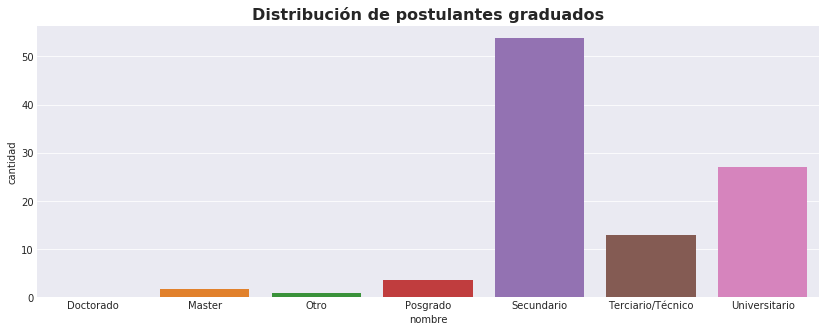

In [132]:
plt.figure(figsize=(14,5))
plt.title('Distribución de postulantes graduados', fontsize=16, fontweight='bold')
sns.barplot(x='nombre', y='cantidad', data=plot_postulantes_graduados)

In [133]:
postulantes_en_curso = postulantes
postulantes_en_curso['cantidad'] = 0
postulantes_en_curso= postulantes.loc[(postulantes['estado']=='En Curso')].groupby('nombre').count()

In [134]:
del postulantes_en_curso['idpostulante']
del postulantes_en_curso['estado']
del postulantes_en_curso['fechanacimiento']
del postulantes_en_curso['sexo']
del postulantes_en_curso['level_0']
del postulantes_en_curso['edad']

In [135]:
plot_postulantes_en_curso = 100 * postulantes_en_curso['cantidad']/len(postulantes.loc[(postulantes['estado']=='En Curso')])
plot_postulantes_en_curso = pd.DataFrame(plot_postulantes_en_curso).reset_index()

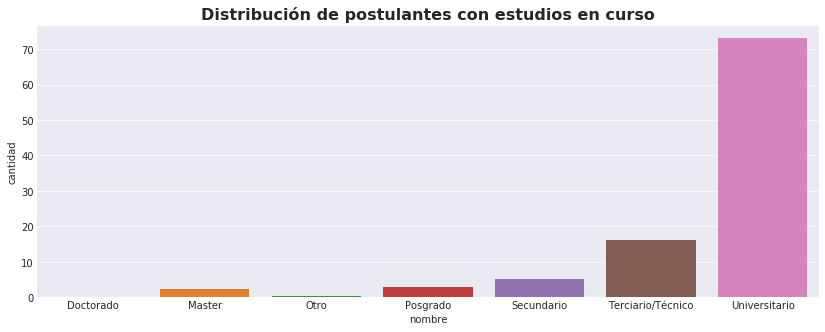

In [136]:
plt.figure(figsize=(14,5))
plt.title('Distribución de postulantes con estudios en curso', fontsize=16, fontweight='bold')
sns.barplot(x='nombre', y='cantidad', data=plot_postulantes_en_curso)

In [137]:
postulantes_abandonado = postulantes
postulantes_abandonado['cantidad'] = 0
postulantes_abandonado= postulantes.loc[(postulantes['estado']=='Abandonado')].groupby('nombre').count()

In [138]:
del postulantes_abandonado['idpostulante']
del postulantes_abandonado['estado']
del postulantes_abandonado['fechanacimiento']
del postulantes_abandonado['sexo']
del postulantes_abandonado['level_0']
del postulantes_abandonado['edad']

In [139]:
postulantes_abandonado = 100 * postulantes_abandonado['cantidad']/len(postulantes.loc[(postulantes['estado']=='En Curso')])
postulantes_abandonado = pd.DataFrame(postulantes_abandonado).reset_index()

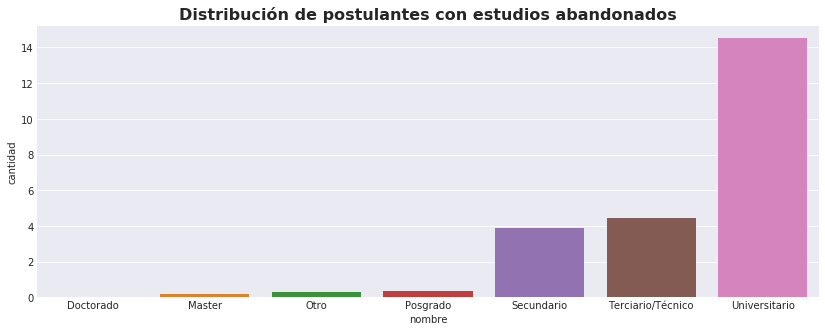

In [140]:
plt.figure(figsize=(14,5))
plt.title('Distribución de postulantes con estudios abandonados', fontsize=16, fontweight='bold')
sns.barplot(x='nombre', y='cantidad', data=postulantes_abandonado)

# Análisis postulaciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
vistas_raw = pd.read_csv('../input/fiuba_3_vistas.csv')
postulaciones_raw = pd.read_csv('../input/fiuba_4_postulaciones.csv')
avisos_raw = pd.read_csv('../input/fiuba_6_avisos_detalle.csv')
generos_raw = pd.read_csv('../input/fiuba_2_postulantes_genero_y_edad.csv')
educacion_raw = pd.read_csv('../input/fiuba_1_postulantes_educacion.csv')

## Preguntas
* **Avisos con más postulaciones**
* **Relación vistas/postulaciones para un mismo aviso**
* **Distribución horaria de postulaciones**
* **Distribución postulaciones por día**
* **Distribución postulaciones por género**
* **Correlación usuario-postulaciones** - analizar si un mismo usuario se postula a avisos del mismo área o no

In [3]:
print(postulaciones_raw.info())
print('---------------------------------')
postulaciones_raw.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    object
dtypes: int64(1), object(2)
memory usage: 77.9+ MB
None
---------------------------------


,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34


**Limpieza y transformaciones**

In [4]:
postulaciones_raw.isna().any()

idaviso             False
idpostulante        False
fechapostulacion    False
dtype: bool

In [5]:
postulaciones = postulaciones_raw.rename(columns={'fechapostulacion':'fecha'})

In [6]:
postulaciones['fecha'] = pd.to_datetime(postulaciones.fecha)

In [7]:
postulaciones.dtypes

idaviso                  int64
idpostulante            object
fecha           datetime64[ns]
dtype: object

In [8]:
postulaciones.shape

(3401623, 3)

**Análisis**

In [9]:
# TOP avisos con más postulaciones
data = pd.merge(postulaciones,avisos_raw[['idaviso','titulo','nombre_area']], on='idaviso')
print(data.isna().any())
data.head(1)

idaviso         False
idpostulante    False
fecha           False
titulo          False
nombre_area     False
dtype: bool


,idaviso,idpostulante,fecha,titulo,nombre_area
0,1112257047,NM5M,2018-01-15 16:22:34,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,Atención al Cliente


In [10]:
top_post = data.idaviso.value_counts().reset_index().rename(columns={'idaviso':'count','index':'idaviso'})

In [11]:
data.idaviso.value_counts().head(3)

1112033906    9932
1112334791    9787
1112204682    9244
Name: idaviso, dtype: int64

In [12]:
top_post.head(3)

,idaviso,count
0,1112033906,9932
1,1112334791,9787
2,1112204682,9244


In [13]:
avisos_raw[avisos_raw.idaviso == 1112334791]

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
13003,1112334791,1,Cajero/a - Part Time,<p>Te estamos buscando para formar parte de un...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,Farmacity


In [14]:
seleccion = avisos_raw.idaviso.isin(top_post.idaviso)
top_post['titulo'] = avisos_raw.loc[seleccion,'titulo'].values
top_post['area'] = avisos_raw.loc[seleccion,'nombre_area'].values
top_post.head(3)

,idaviso,count,titulo,area
0,1112033906,9932,VENDEDOR/A PROVINCIA DE SANTA FE,Comercial
1,1112334791,9787,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,Transporte
2,1112204682,9244,Vendedor Viajante TUCUMAN/SANTIAGO DEL ESTERO,Ventas


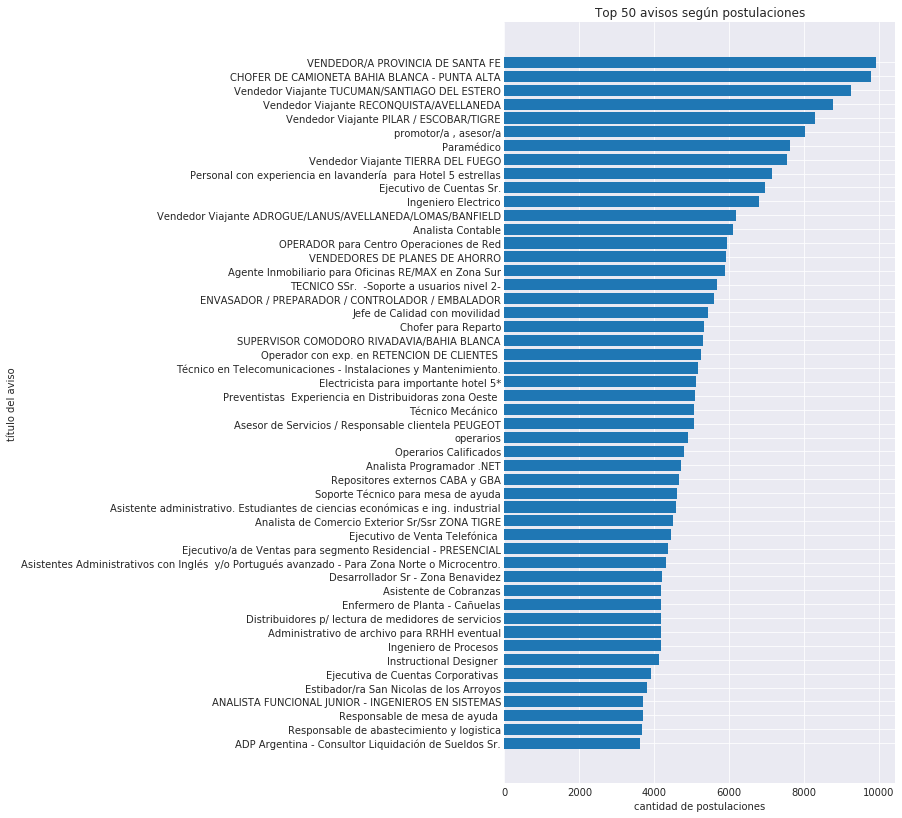

In [15]:
plot_data = top_post[['titulo','count']].head(50).iloc[::-1]
plt.figure(figsize=(7,14))
plt.title('Top 50 avisos según postulaciones')
plt.barh(plot_data['titulo'], plot_data['count'])
plt.xlabel('cantidad de postulaciones')
plt.ylabel('título del aviso')
plt.show()

### **Postulaciones segun nivel eductivo**
Analicemos como sonlas postulaciones según enl nivel educativo de los postulantes

In [16]:
data = postulaciones.merge(avisos_raw[['idaviso','titulo','nombre_area']], on='idaviso',how='left')\
                    .merge(educacion_raw, on='idpostulante',how='left')\
                    .merge(generos_raw,on='idpostulante',how='left')\
                    .rename(columns={'nombre_area':'area','nombre':'nivel_educ'})

In [17]:
print(data.info())
print(data.isna().any())
data.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630562 entries, 0 to 5630561
Data columns (total 9 columns):
idaviso            int64
idpostulante       object
fecha              datetime64[ns]
titulo             object
area               object
nivel_educ         object
estado             object
fechanacimiento    object
sexo               object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 429.6+ MB
None
idaviso            False
idpostulante       False
fecha              False
titulo              True
area                True
nivel_educ          True
estado              True
fechanacimiento     True
sexo               False
dtype: bool


,idaviso,idpostulante,fecha,titulo,area,nivel_educ,estado,fechanacimiento,sexo
0,1112257047,NM5M,2018-01-15 16:22:34,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,Atención al Cliente,Secundario,Graduado,1970-12-03,FEM


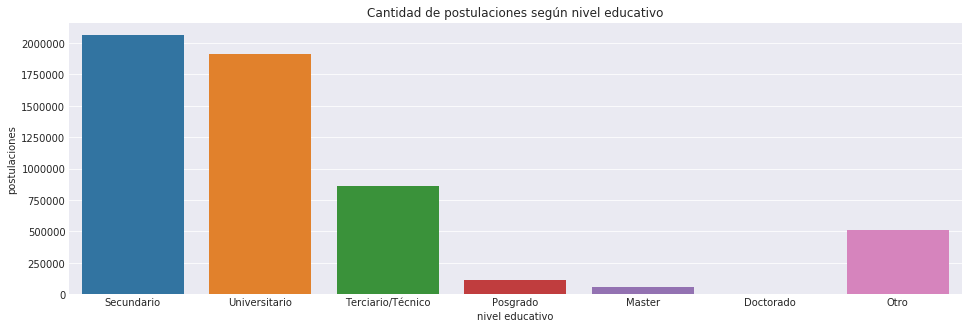

In [18]:
plt.figure(figsize=(16,5))
plt.title('Cantidad de postulaciones según nivel educativo')
sns.countplot(x=data['nivel_educ'],data=data)
plt.xlabel('nivel educativo')
plt.ylabel('postulaciones')
plt.show()

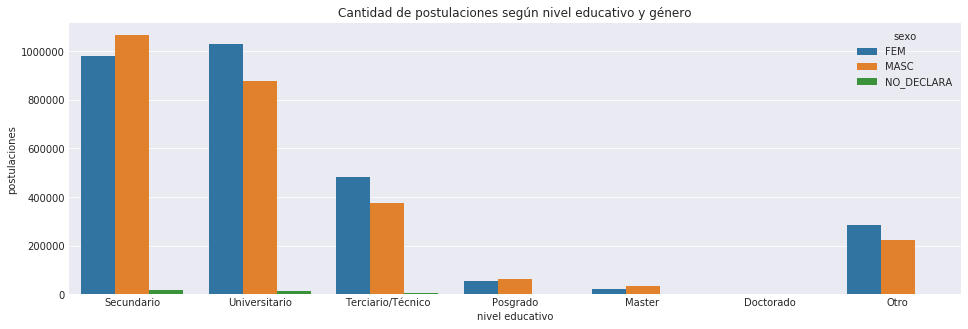

In [19]:
plt.figure(figsize=(16,5))
plt.title('Cantidad de postulaciones según nivel educativo y género')
sns.countplot(x=data['nivel_educ'],data=data, hue=data['sexo'])
plt.xlabel('nivel educativo')
plt.ylabel('postulaciones')
plt.show()

In [20]:
data_to_pivot = data
data_to_pivot['count'] = 1
data_pivoted = data_to_pivot[['nivel_educ','sexo','count']].groupby(['sexo','nivel_educ']).sum().pivot_table(values='count',index='sexo',columns='nivel_educ')
data_pivoted

nivel_educ,Doctorado,Master,Otro,Posgrado,Secundario,Terciario/Técnico,Universitario
sexo,,,,,,,
FEM,2187,22644,284691,54066,978050,482151,1026251
MASC,1348,35658,221852,62435,1063165,376653,875845
NO_DECLARA,17,212,1674,423,19574,5660,14112


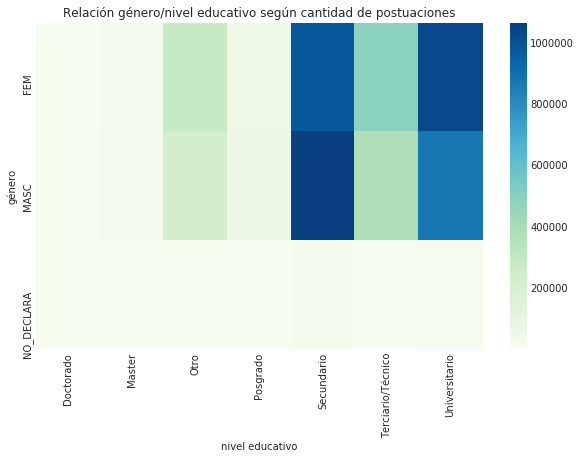

In [21]:
plt.figure(figsize=(10,6))
plt.title('Relación género/nivel educativo según cantidad de postuaciones')
sns.heatmap(data_pivoted, cmap='GnBu')
plt.xlabel('nivel educativo')
plt.ylabel('género')
plt.show()

### **Top áreas con más postulaciones**

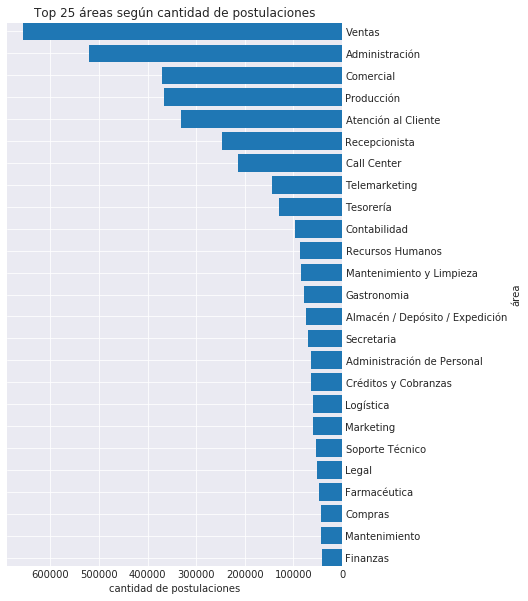

In [22]:
plot_data = data.area.value_counts().head(25).iloc[::-1]
plt.figure(figsize=(6,10))
plt.title('Top 25 áreas según cantidad de postulaciones')
plt.barh(plot_data.index,plot_data.values)
plt.xlabel('cantidad de postulaciones')
plt.ylabel('área')
plt.autoscale(tight=True, axis='y')
plt.gca().invert_xaxis()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.show()

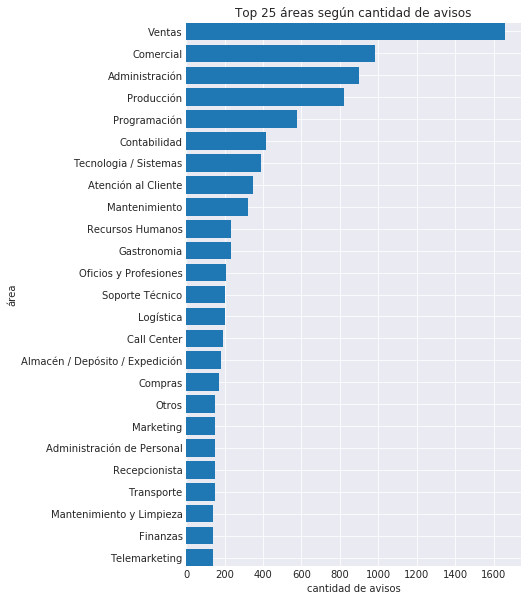

In [23]:
plot_data = avisos_raw.nombre_area.value_counts().head(25).iloc[::-1]
plt.figure(figsize=(6,10))
plt.title('Top 25 áreas según cantidad de avisos')
plt.barh(plot_data.index,plot_data.values)
plt.xlabel('cantidad de avisos')
plt.ylabel('área')
plt.autoscale(tight=True, axis='y')
#plt.gca().yaxis.tick_right()
#plt.gca().yaxis.set_label_position("right")
plt.show()

## **Relación vistas/postulaciones**

In [24]:
vistas_cont = vistas_raw.idAviso.value_counts().reset_index().rename(columns={'idAviso':'vistas','index':'idaviso'})
postulaciones_cont = postulaciones_raw.idaviso.value_counts().reset_index().rename(columns={'idaviso':'postulaciones','index':'idaviso'})

In [25]:
vistas_cont.head(1)

,idaviso,vistas
0,1112363488,4169


In [26]:
postulaciones_cont.head(1)

,idaviso,postulaciones
0,1112033906,9932


In [27]:
vistas_y_post = pd.merge(vistas_cont, postulaciones_cont, on='idaviso')
vistas_y_post.head(1)

,idaviso,vistas,postulaciones
0,1112363488,4169,1244


In [28]:
# Aproximación lineal por cuadrados mínimos
x = vistas_y_post['vistas']
y = vistas_y_post['postulaciones']
fit = np.polyfit(x, y, deg=1)
least_squares_aprox = fit[0] * x + fit[1]

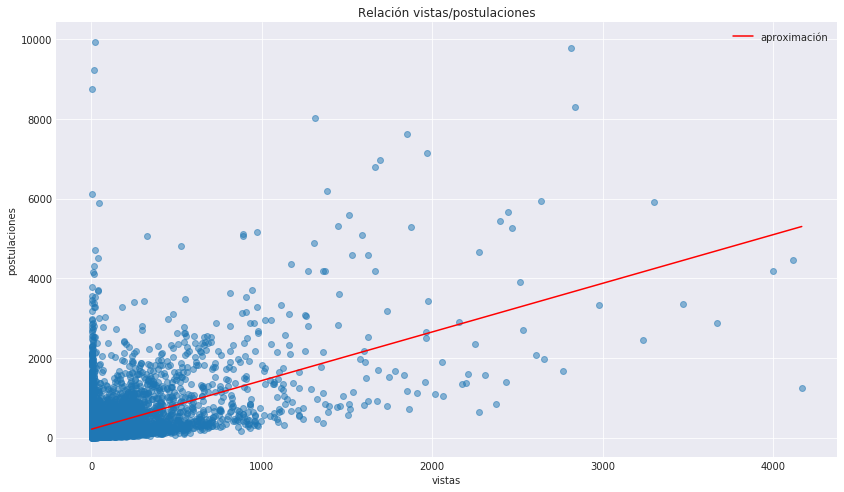

In [29]:
plt.figure(figsize=(14,8))
plt.title('Relación vistas/postulaciones')
plt.scatter(x=vistas_y_post.vistas,y=vistas_y_post.postulaciones, alpha=.5)
plt.plot(x, least_squares_aprox, color='red', label='aproximación')
plt.legend(['aproximación'])
plt.xlabel('vistas')
plt.ylabel('postulaciones')
plt.show()

In [30]:
vistas_y_post_filtered = vistas_y_post[vistas_y_post['vistas']<2000]
# Aproximación por cuadrados mínimos
x = vistas_y_post_filtered['vistas']
y = vistas_y_post_filtered['postulaciones']
fit = np.polyfit(x, y, deg=1)
least_squares_aprox = fit[0] * x + fit[1]

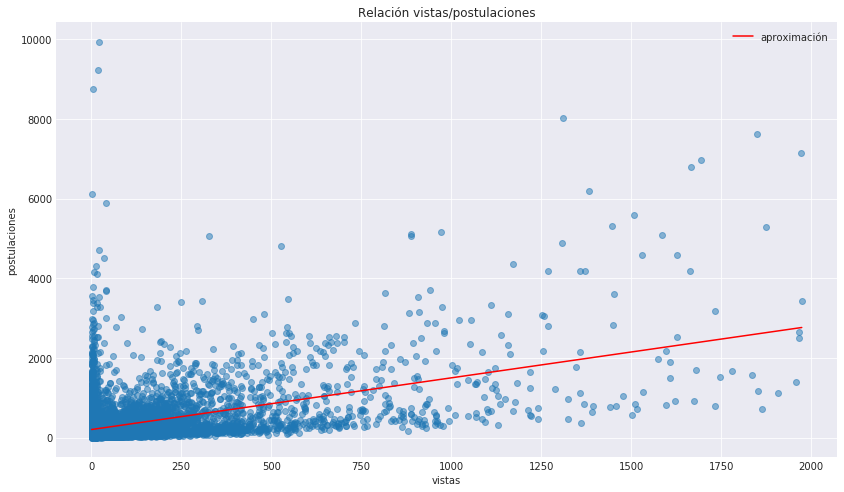

In [31]:
plt.figure(figsize=(14,8))
plt.title('Relación vistas/postulaciones')
plt.scatter(x=vistas_y_post_filtered.vistas,y=vistas_y_post_filtered.postulaciones, alpha=.5)
plt.plot(x, least_squares_aprox, color='red', label='aproximación')
plt.legend(['aproximación'])
plt.xlabel('vistas')
plt.ylabel('postulaciones')
plt.show()

## ** Postulaciones por usuario **

In [32]:
postulaciones.shape

(3401623, 3)

In [33]:
post_cont = postulaciones.idpostulante.value_counts()
print('Promedio de postulaciones por usuario:',post_cont.values.mean())
print('Cantidad máxima de postulaciones de un usuario:', post_cont.values.max())
print('Cantidad mínima de postulaciones de un usuario:', post_cont.values.min())

Promedio de postulaciones por usuario: 16.93293277846362
Cantidad máxima de postulaciones de un usuario: 3166
Cantidad mínima de postulaciones de un usuario: 1


In [34]:
post_cont.describe()

count    200888.000000
mean         16.932933
std          31.267385
min           1.000000
25%           3.000000
50%           8.000000
75%          19.000000
max        3166.000000
Name: idpostulante, dtype: float64

**Usuario con más postulaciones**

In [35]:
max_user_post = postulaciones.idpostulante.value_counts().head(1)
max_user_post

axmjOE    3166
Name: idpostulante, dtype: int64

In [36]:
postulaciones.idpostulante.value_counts().head(1).index

Index(['axmjOE'], dtype='object')

In [37]:
data = postulaciones.merge(avisos_raw, on='idaviso', how='inner').rename(columns={'nombre_area':'area'})

In [38]:
data.shape

(3074206, 13)

In [39]:
max_user_post_areas = data.loc[data.idpostulante == max_user_post.index[0],['area']].area.value_counts()

In [40]:
max_user_post_areas.sum()

2846

In [41]:
max_user_post_areas.describe()

count    140.000000
mean      20.328571
std       39.542063
min        1.000000
25%        3.000000
50%        8.000000
75%       19.000000
max      289.000000
Name: area, dtype: float64

In [42]:
print('Promedio de postulaciones por área:',max_user_post_areas.values.mean())

Promedio de postulaciones por área: 20.32857142857143


In [43]:
print('fecha inicial:', data.fecha.min())
print('fecha final:', data.fecha.max())
print('tiempo transcurrido: ',data.fecha.max()-data.fecha.min())

fecha inicial: 2018-01-15 00:00:01
fecha final: 2018-02-28 23:59:55
tiempo transcurrido:  44 days 23:59:54


In [44]:
print('primedio de postulaciones por día:',max_user_post_areas.sum()/44)

primedio de postulaciones por día: 64.68181818181819


# Análisis vistas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
vistas_raw = pd.read_csv('../input/fiuba_3_vistas.csv')
postulaciones_raw = pd.read_csv('../input/fiuba_4_postulaciones.csv')
avisos_raw = pd.read_csv('../input/fiuba_6_avisos_detalle.csv')
generos_raw = pd.read_csv('../input/fiuba_2_postulantes_genero_y_edad.csv')
educacion_raw = pd.read_csv('../input/fiuba_1_postulantes_educacion.csv')

## Preguntas
* **Avisos con más vistas**
* **Avisos con más postulaciones**
* **Relación vistas/postulaciones para un mismo aviso**
* **Distribución horaria de avisos y postulaciones**
* **Distribución vistas por día y género**
* **Correlación usuario-postulaciones** - analizar si un mismo usuario se postula a avisos del mismo área o no

### Veo los df

In [3]:
vistas_raw.head(1)

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z


In [4]:
postulaciones_raw.head(1)

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34


In [5]:
avisos_raw.head(1)

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR


In [6]:
generos_raw.head(1)

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM


In [7]:
educacion_raw.head(1)

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso


### Limpieza y/o transformaciones

In [8]:
vistas = vistas_raw

In [9]:
postulaciones = postulaciones_raw

Unifico criterios de nombres de columnas
* timestamp        -> fecha  
* fechapostulacion -> fecha

In [10]:
vistas['timestamp'] = pd.to_datetime(vistas.timestamp)

In [11]:
vistas['fecha'] = pd.to_datetime(vistas.timestamp.dt.date)
vistas['hora'] = vistas.timestamp.dt.hour
vistas['min'] = vistas.timestamp.dt.minute
vistas['seg'] = vistas.timestamp.dt.second
#vistas.rename(columns={'timestamp':'fecha'}, inplace=True)


In [12]:
vistas.head(1)

,idAviso,timestamp,idpostulante,fecha,hora,min,seg
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23,18,38,13


In [13]:
vistas.dtypes

idAviso                  int64
timestamp       datetime64[ns]
idpostulante            object
fecha           datetime64[ns]
hora                     int64
min                      int64
seg                      int64
dtype: object

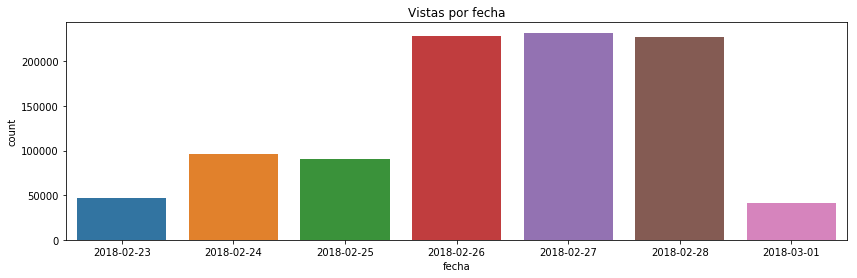

In [14]:
plt.figure(figsize=(14,4))
plt.title('Vistas por fecha')
sns.countplot(vistas.fecha.dt.date)
plt.show()

In [15]:
data = pd.merge(vistas, generos_raw, on='idpostulante')

In [16]:
data.head(1)

,idAviso,timestamp,idpostulante,fecha,hora,min,seg,fechanacimiento,sexo
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23,18,38,13,1991-11-16,MASC


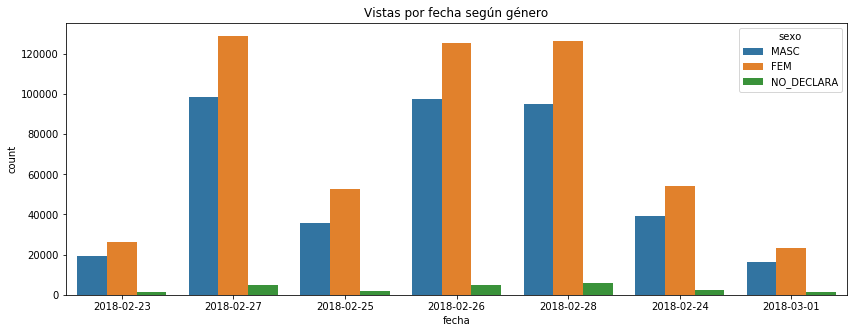

In [17]:
plt.figure(figsize=(14,5))
plt.title('Vistas por fecha según género')
sns.countplot(x=data.fecha.dt.date,hue='sexo',data=data)
plt.show()

In [ ]:
dias = ['lunes','martes','miércoles','jueve','viernes','sábado','domingo']
plt.figure(figsize=(14,5))
plt.title('Vistas por día de la semana según género')
sns.countplot(data.fecha.dt.dayofweek, data=data)
plt.xticks(data.fecha.dt.dayofweek,dias)
plt.show()

In [ ]:
postulaciones.rename(columns={'fechapostulacion':'fecha'}, inplace=True)

**vistas**

In [ ]:
vistas.info()

In [ ]:
vistas.head(1)

In [ ]:
# Veo que NO faltan datos pero debo transofrmar la columna timestamp en datetime

In [ ]:
vistas.fecha = pd.to_datetime(vistas.fecha)
vistas['hora'] = vistas.fecha.dt.time
vistas['fecha'] = vistas.fecha.dt.date

In [ ]:
vistas.dtypes

In [ ]:
vistas.head(3)

**postulaciones**

In [ ]:
postulaciones.info()

In [ ]:
postulaciones.head(1)

In [ ]:
postulaciones.fecha = pd.to_datetime(postulaciones.fecha)

In [ ]:
postulaciones.dtypes

In [ ]:
postulaciones.idpostulante.isna().any()

# Análisis

### Vistas

**Avisos con más vistas**

In [ ]:
data = vistas.idAviso.value_counts().value_counts()

In [ ]:
print('cant:',data.count(),'| min:',data.min(),'| max:',data.max())

In [ ]:
data.plot(kind='hist',
          bins=60, 
          logy=True,
          figsize=(14,4), 
          title='Distribución de vistas de publicaciones', 
          grid=True,
          xticks=[x for x in range(0,1200,20)],
          rot=75)
plt.xlabel('Cantidad de vistas')
plt.ylabel('Frecuencia')
plt.show()

Puede verse como la mayor cantidad de avisos tiene menos de 20 vistas

In [ ]:
data[data < 20].plot(kind='hist',
          bins=18,
          figsize=(14,4), 
          title='Distribución de vistas de publicaciones (menos de 20 vistas)', 
          grid=True,
          xticks=[x for x in range(0,20)])
plt.xlabel('Cantidad de vistas')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
data.plot(kind='kde', figsize=(14,4))
plt.show()

In [ ]:
vistas.idAviso.value_counts().head(50).plot(kind='bar', figsize=(12,5))
plt.show()

In [ ]:
data = vistas.idAviso.value_counts()

In [ ]:
(data.max()-data.min())

In [ ]:
data = vistas.idAviso.value_counts()
plt.figure(figsize=(14,6))
plt.title('Distribución')
plt.hist(data.head(5000), bins=20, density=True)
plt.xticks([x for x in range(0,4000,200)])
plt.grid(True)
plt.show()

In [ ]:
avisos = avisos_raw.rename(columns={'idaviso':'idAviso'})
avisos.head(1)

In [ ]:
top_vistas = vistas.idAviso.value_counts().head(10).reset_index().rename(columns={'idAviso':'count','index':'idAviso'})
top_vistas

In [ ]:
data = top_vistas.merge(avisos[['idAviso','titulo','nombre_area']], on='idAviso')
data